시계열 수치를 입력해서 다음 수치를 예측하는 모델들에 대해서 알아보겠습니다. 각 모델에 코사인(cos) 데이터를 학습시킨 후, 처음 일부 데이터를 알려주면 이후 코사인 형태의 데이터 예측을 얼마나 잘 하는 지 테스트 하겠습니다.

---
### 데이터셋 준비

먼저 코사인 데이터를 만들어보겠습니다. 시간의 흐름에 따라 진폭이 -1.0에서 1.0사이로 변하는 1,000개의 실수값을 생성합니다.

In [ ]:
import numpy as np

signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

생성한 데이터를 확인해보겠습니다.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plot_x = np.arange(1600)
plot_y = signal_data
plt.plot(plot_x, plot_y)
plt.show()

생성한 코사인 데이터를 모델에 학습시키기 위해서는 데이터와 라벨로 구성된 데이터셋으로 만들어야 합니다. 이전 수치들을 입력하여 다음 수치를 예측하는 문제이므로 데이터는 이전 수치들이 되고, 라벨은 다음 수치가 됩니다. 다른 예제들과는 달리 데이터와 라벨이 모두 같은 속성입니다. 아래 create_dataset() 함수는 시계열 수치를 입력받아 데이터셋을 생성합니다. 이 때 look_back 인자는 얼마만큼의 이전 수치를 데이터로 만들것인가를 결정합니다.

In [ ]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

-1.0에서 1.0까지의 값을 가지는 코사인 데이터를 0.0과 1.0 사이의 값을 가지도록 정규화를 한 뒤 훈련셋과 시험셋으로 분리합니다. 이전 20개의 수치를 입력하여 다음 수치 1개를 예측하는 데이터셋을 만들기 위해 look_back 인자를 20으로 설정하였습니다.

In [ ]:
look_back = 20
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

train_size = int(len(signal_data) * 0.67)
test_size = len(signal_data) - train_size
train, test = signal_data[0:train_size,:], signal_data[train_size:len(dataset),:]

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

---
### 레이어 준비

본 장에서 새롭게 소개되는 블록들은 다음과 같습니다.

|블록|이름|설명|
|:-:|:-:|:-|
|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Embedding_s.png)|Embedding|단어를 의미론적 기하공간에 매핑할 수 있도록 벡터화시킵니다.|
|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Conv1D_s.png)|Conv1D|필터를 이용하여 지역적인 특징을 추출합니다.|
|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_GlobalMaxPooling1D_s.png)|GlobalMaxPooling1D|여러 개의 벡터 정보 중 가장 큰 벡터를 골라서 반환합니다.|
|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_MaxPooling1D_s.png)|MaxPooling1D|입력벡터에서 특정 구간마다 값을 골라 벡터를 구성한 후 반환합니다.|

MLP

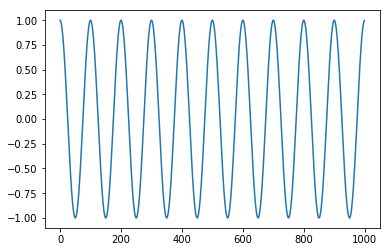

Epoch 1/100
630/630 [==============================] - 0s - loss: 0.2066     
Epoch 2/100
630/630 [==============================] - 0s - loss: 0.0548     
Epoch 3/100
630/630 [==============================] - 0s - loss: 0.0479     
Epoch 4/100
630/630 [==============================] - 0s - loss: 0.0431     
Epoch 5/100
630/630 [==============================] - 0s - loss: 0.0359     
Epoch 6/100
630/630 [==============================] - 0s - loss: 0.0355     
Epoch 7/100
630/630 [==============================] - 0s - loss: 0.0287     
Epoch 8/100
630/630 [==============================] - 0s - loss: 0.0284     
Epoch 9/100
630/630 [==============================] - 0s - loss: 0.0269     
Epoch 10/100
630/630 [==============================] - 0s - loss: 0.0295     
Epoch 11/100
630/630 [==============================] - 0s - loss: 0.0247     
Epoch 12/100
630/630 [==============================] - 0s - loss: 0.0279     
Epoch 13/100
630/630 [==============================] - 0s - 

In [3]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import theano

%matplotlib inline

dataset = np.cos(np.arange(1000)*(20*np.pi/1000))[:,None]
plot_x = np.arange(1000)
plot_y = dataset
plt.plot(plot_x, plot_y)
plt.show()

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 40
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

trainX = np.squeeze(trainX)
testX = np.squeeze(testX)
theano.config.compute_test_value = "ignore"
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(Dense(32,input_dim=40,activation="relu"))
model.add(Dropout(0.3))
for i in range(2):
    model.add(Dense(32,activation="relu"))
    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adagrad')
model.fit(trainX, trainY, epochs=100, batch_size=32)

trainScore = model.evaluate(trainX, trainY, batch_size=batch_size, verbose=0)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX[:252], testY[:252], batch_size=batch_size, verbose=0)
print('Test Score: ', testScore)

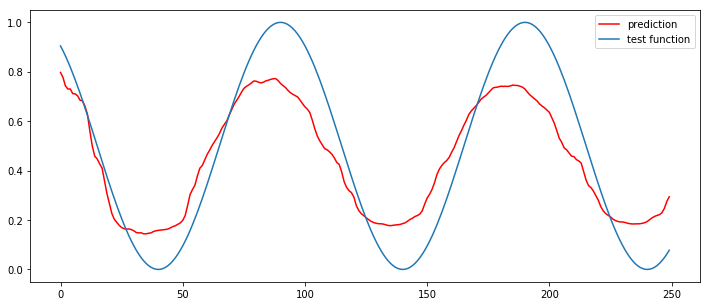

In [22]:
look_ahead = 250
xval = testX[0, None]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(xval, batch_size=32)
    predictions[i] = prediction
    xval = np.hstack([xval[:,1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),testY[:look_ahead],label="test function")
plt.legend()
plt.show()

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

LSTM

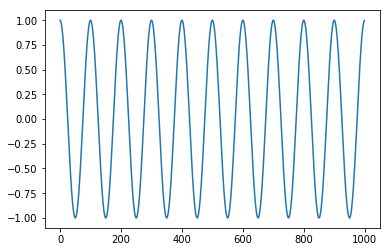

Epoch 1/1
630/630 [==============================] - 2s - loss: 0.0309     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0125     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0070     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0053     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0038     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0038     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0032     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0038     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0030     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0027     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0029     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0026     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0024     
Epoch 1/1
63

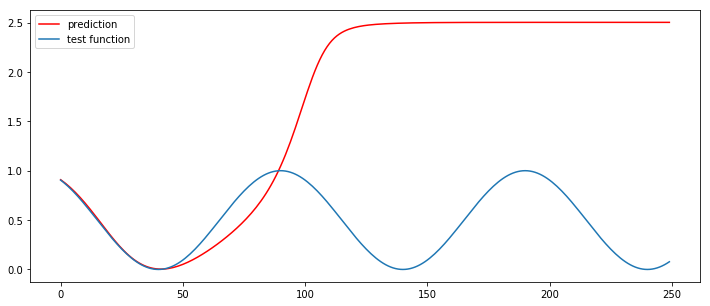

In [26]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import theano

%matplotlib inline

dataset = np.cos(np.arange(1000)*(20*np.pi/1000))[:,None]
plot_x = np.arange(1000)
plot_y = dataset
plt.plot(plot_x, plot_y)
plt.show()

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 40
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

theano.config.compute_test_value = "ignore"
# create and fit the LSTM network
batch_size = 1
model = Sequential()

model.add(LSTM(32, input_shape=(None, 1)))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(200):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, shuffle=False)
    model.reset_states()
    
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX[:252], testY[:252], batch_size=batch_size, verbose=0)
print('Test Score: ', testScore)  

look_ahead = 250
xhat_test = testX[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat_test]), batch_size=batch_size)
    predictions[i] = prediction
    xhat_test = np.vstack([xhat_test[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),testY[:look_ahead],label="test function")
plt.legend()
plt.show()

Stateful LSTM

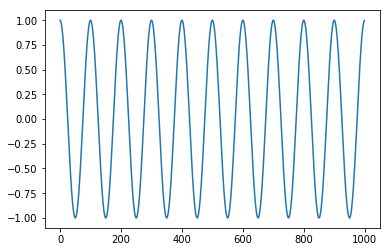

Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0310     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0172     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0074     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0056     
Epoch 1/1
630/630 [==============================] - 2s - loss: 0.0043     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0039     
Epoch 1/1
630/630 [==============================] - 2s - loss: 0.0036     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0031     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0032     
Epoch 1/1
630/630 [==============================] - 2s - loss: 0.0028     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0031     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0030     
Epoch 1/1
630/630 [==============================] - 1s - loss: 0.0030     
Epoch 1/1
63

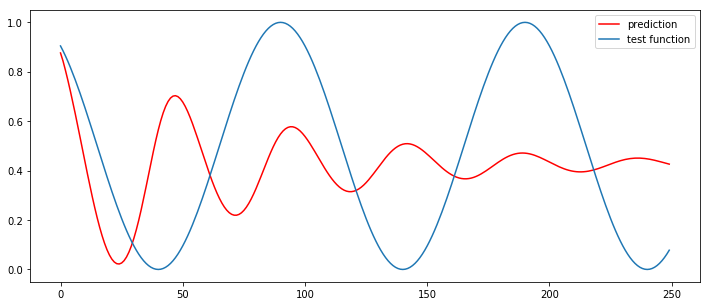

In [24]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import theano

%matplotlib inline

dataset = np.cos(np.arange(1000)*(20*np.pi/1000))[:,None]
plot_x = np.arange(1000)
plot_y = dataset
plt.plot(plot_x, plot_y)
plt.show()

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 40
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

theano.config.compute_test_value = "ignore"
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(200):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, shuffle=False)
    model.reset_states()
    
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX[:252], testY[:252], batch_size=batch_size, verbose=0)
print('Test Score: ', testScore)  

look_ahead = 250
xhat_test = testX[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat_test]), batch_size=batch_size)
    predictions[i] = prediction
    xhat_test = np.vstack([xhat_test[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),testY[:look_ahead],label="test function")
plt.legend()
plt.show()

Stateful Statck LSTM

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

Using Theano backend.


In [2]:
import matplotlib.pyplot as plt

import theano

%matplotlib inline

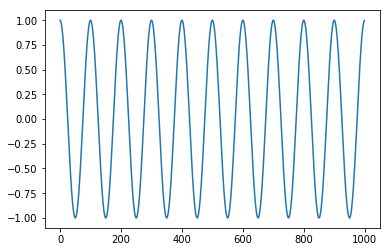

In [3]:
dataset = np.cos(np.arange(1000)*(20*np.pi/1000))[:,None]
plot_x = np.arange(1000)
plot_y = dataset
plt.plot(plot_x, plot_y)
plt.show()

In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
look_back = 40
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [9]:
%%time
theano.config.compute_test_value = "ignore"
# create and fit the LSTM network
batch_size = 1
model = Sequential()
for i in range(2):
    model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(200):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, shuffle=False)
    model.reset_states()

Epoch 1/1
630/630 [==============================] - 5s - loss: 0.0432     
Epoch 1/1
630/630 [==============================] - 5s - loss: 0.0178     
Epoch 1/1
630/630 [==============================] - 5s - loss: 0.0084     
Epoch 1/1
630/630 [==============================] - 5s - loss: 0.0072     
Epoch 1/1
630/630 [==============================] - 5s - loss: 0.0085     
Epoch 1/1
630/630 [==============================] - 5s - loss: 0.0086     
Epoch 1/1
630/630 [==============================] - 5s - loss: 0.0088     
Epoch 1/1
630/630 [==============================] - 5s - loss: 0.0070     
Epoch 1/1
630/630 [==============================] - 5s - loss: 0.0071     
Epoch 1/1
630/630 [==============================] - 5s - loss: 0.0064     
Epoch 1/1
630/630 [==============================] - 5s - loss: 0.0059     
Epoch 1/1
630/630 [==============================] - 5s - loss: 0.0057     
Epoch 1/1
630/630 [==============================] - 5s - loss: 0.0048     
Epoch 1/1
63

/Users/tykimos/Projects/Keras/venv/lib/python2.7/site-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


In [10]:
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX[:252], testY[:252], batch_size=batch_size, verbose=0)
print('Test Score: ', testScore)

619/630 [============================>.] - ETA: 0s('Train Score: ', 0.00033152230966531683)
('Test Score: ', 0.00037402422053654772)


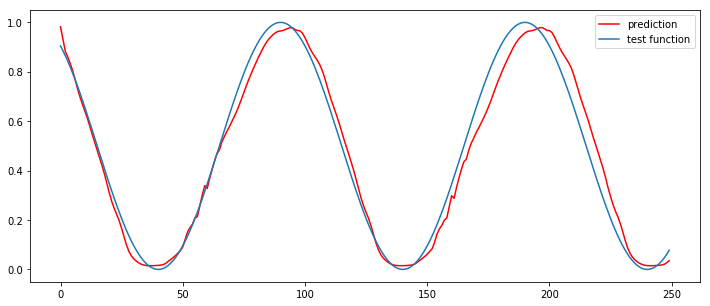

In [73]:
look_ahead = 250
xhat_test = testX[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat_test]), batch_size=batch_size)
    predictions[i] = prediction
    xhat_test = np.vstack([xhat_test[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),testY[:look_ahead],label="test function")
plt.legend()
plt.show()

In [56]:
look_ahead = 250
trainPredict = [np.vstack([trainX[-1][1:], trainY[-1]])]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([trainPredict[-1]]), batch_size=batch_size)
    predictions[i] = prediction
    trainPredict.append(np.vstack([trainPredict[-1][1:],prediction]))

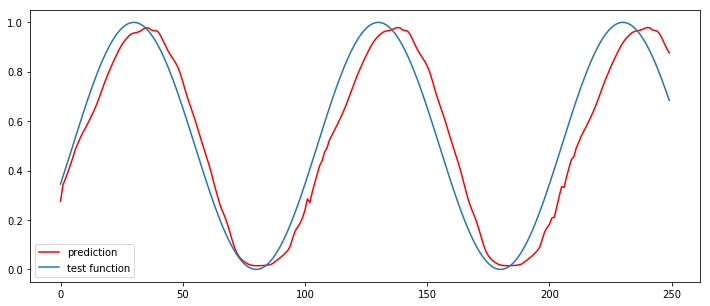

In [57]:
plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(trainX)),np.squeeze(trainX))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(trainPredict)[:,None][1:]))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(testY)[:,None][:200]),'r')
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),dataset[train_size:(train_size+look_ahead)],label="test function")
plt.legend()
plt.show()

In [16]:
batch_size

1

In [38]:
look_ahead = 250
xhat = np.array([testX[0]])


In [40]:
    prediction = model.predict(xhat, batch_size=1)

In [45]:
xhat.shape

(40, 1)

In [44]:
xhat[0][1:]

array([], dtype=float64)

In [46]:
look_ahead = 250
xhat = np.array([testX[0]])
predictions = np.zeros((look_ahead,1))

In [48]:
xhat.shape

(1, 40, 1)

In [49]:
prediction = model.predict(xhat, batch_size=1)

In [54]:
xhat = np.array(np.array(np.vstack([xhat[-1][1:],prediction])))

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [51]:
xhat.shape

(40, 1)

In [42]:
for i in range(look_ahead):
    prediction = model.predict(xhat, batch_size=1)
    predictions[i] = prediction
    xhat = np.array(np.vstack([xhat[-1][1:],prediction]))

ValueError: Error when checking : expected lstm_4_input to have 3 dimensions, but got array with shape (40, 1)

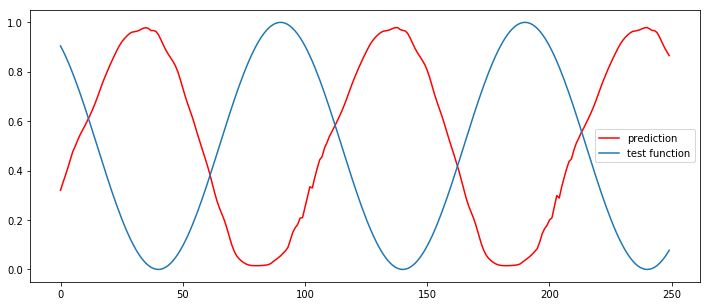

In [13]:
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),testY[:look_ahead],label="test function")
plt.legend()
plt.show()

In [ ]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

import theano

%matplotlib inline

dataset = np.cos(np.arange(1000)*(20*np.pi/1000))[:,None]
plot_x = np.arange(1000)
plot_y = dataset
plt.plot(plot_x, plot_y)
plt.show()

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 40
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

theano.config.compute_test_value = "ignore"

# create and fit the LSTM network
batch_size = 1
model = Sequential()
for i in range(2):
    model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
    model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
for i in range(200):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, shuffle=False)
    model.reset_states()
    
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size, verbose=0)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX[:252], testY[:252], batch_size=batch_size, verbose=0)
print('Test Score: ', testScore)

look_ahead = 250
trainPredict = [np.vstack([trainX[-1][1:], trainY[-1]])]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([trainPredict[-1]]), batch_size=batch_size)
    predictions[i] = prediction
    trainPredict.append(np.vstack([trainPredict[-1][1:],prediction]))


plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(trainX)),np.squeeze(trainX))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(trainPredict)[:,None][1:]))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(testY)[:,None][:200]),'r')
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),dataset[train_size:(train_size+look_ahead)],label="test function")
plt.legend()
plt.show()

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
look_ahead = 250
xval = np.hstack([testX[0][:]])[None,:]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(xval, batch_size=32)
    predictions[i] = prediction
    xval = np.hstack([xval[:,1:],prediction])
    
plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(trainX)),np.squeeze(trainX))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(trainPredict)[:,None][1:]))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(testY)[:,None][:200]),'r')
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),testY[:look_ahead],label="test function")
plt.legend()
plt.show()

In [ ]:


trainX = np.reshape(x_train, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
# 0. 사용할 패키지 불러오기
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 80

# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1600))[:,None]

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[:800,:]
val = signal_data[800:1200,:]
test = signal_data[1200:,:]

x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(32, input_dim=look_back, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(loss='mse', optimizer='adagrad')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
#plt.ylim(0.0, 300.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

# 7. 모델 사용하기
look_ahead = 250
xhat = np.hstack([x_test[0][1:], y_test[0]])[None,:]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    yhat = model.predict(xhat, batch_size=32)
    predictions[i] = yhat
    xhat = np.hstack([xhat[:,1:],yhat])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead), predictions, 'r', label="prediction")
plt.plot(np.arange(look_ahead), test[20:look_ahead+20], label="test function")
plt.legend()
plt.show()

In [ ]:
xhat.shape

In [ ]:
x_test[0]

In [ ]:
test[0:40]

In [ ]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

def create_dataset(raw, window):
    x_dataset, y_dataset = [], []
    for i in range(len(raw)-window):
        x_dataset.append(raw[i:(i+window), 0])
        y_dataset.append(raw[i + window, 0])
    return np.array(x_dataset), np.array(y_dataset)

# 1. 데이터셋 생성하기
timestep = 4

cos_data = np.cos(np.arange(1000)*(10*np.pi/800))[:,None]
x_dataset, y_dataset = create_dataset(cos_data, timestep)

# 데이터셋 확인
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cos_data)   
plt.show()

x_train = x_dataset[:700]
y_train = y_dataset[:700]
x_test = x_dataset[700:]
y_test = y_dataset[700:]

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 2. 모델 구성하기
model = Sequential()
model.add(LSTM(64, input_shape=(timestep, 1), return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=1)

# 5. 학습과정 확인하기
plt.plot(hist.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=1)
print('loss : ' + str(loss))

In [ ]:
# 7. 모델 사용하기
yhat_test = np.zeros((y_test.shape[0], 1))
xhat_test = [np.vstack([x_test[0][:]])]
    
for i in range(y_test.shape[0]):
    yhat = model.predict([np.array([xhat_test[0]])], batch_size=1)
    yhat_test[i] = yhat
    xhat_test = [np.vstack([xhat_test[-1][1:], yhat])]

plt.plot(y_test)
plt.plot(yhat_test)
plt.show()

In [ ]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

def create_dataset(raw, window=4):
    x_dataset, y_dataset = [], []
    for i in range(len(raw)-window):
        x_dataset.append(raw[i:(i+window), 0])
        y_dataset.append(raw[i + window, 0])
    return np.array(x_dataset), np.array(y_dataset)

# 1. 데이터셋 생성하기
cos_data = np.cos(np.arange(1000)*(10*np.pi/1500))[:,None]
x_dataset, y_dataset = create_dataset(cos_data)

# 데이터셋 확인
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cos_data)   
plt.show()

x_train = x_dataset[:700]
y_train = y_dataset[:700]
x_test = x_dataset[700:]
y_test = y_dataset[700:]

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 2. 모델 구성하기
model = Sequential()
model.add(LSTM(64, batch_input_shape=(1, 4, 1), return_sequences=True, stateful=True))
model.add(Dropout(0.25))
model.add(LSTM(64, stateful=True))
model.add(Dropout(0.25))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
for i in range(50):
    hist = model.fit(x_train, y_train, epochs=1, batch_size=1)
    model.reset_states()

# 5. 학습과정 확인하기
plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# 6. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=1)
model.reset_states()
print('loss : ' + str(loss))

In [ ]:
# 7. 모델 사용하기

yhat_test = np.zeros((y_test.shape[0], 1))
xhat_test = [np.vstack([x_test[0][:]])]
    
for i in range(y_test.shape[0]):
    yhat = model.predict([np.array([xhat_test[-1]])], batch_size=1)
    yhat_test[i] = yhat
    xhat_test = [np.vstack([xhat_test[-1][1:], yhat])]

plt.plot(y_test)
plt.plot(yhat_test)
plt.show()

---
### 데이터셋 준비

입력 x에 대해 2를 곱해 두 배 정도 값을 갖는 출력 y가 되도록 데이터셋을 생성해봤습니다. 선형회귀 모델을 사용한다면 Y = w * X + b 일 때, w가 2에 가깝고, b가 0.16에 가깝게 되도록 학습시키는 것이 목표입니다.

In [ ]:
import numpy as np

# 데이터셋 생성
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 데이터셋 확인
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_train, y_train, 'ro')
plt.plot(x_test, y_test, 'bo')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_5.png)

---
### 레이어 준비

수치예측 모델에 사용할 레이어는 `Dense`와 `Activation`입니다. `Activation`에는 은닉층(hidden layer)에 사용할 `relu`를 준비했습니다. 데이터셋은 일차원 벡터만 다루도록 하겠습니다.

|종류|구분|상세구분|브릭|
|:-:|:-:|:-:|:-:|
|데이터셋|Vector|-|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Dataset_Vector_s.png)|
|레이어|Dense||![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Dense_s.png)|
|레이어|Activation|relu|![img](http://tykimos.github.com/Keras/warehouse/DeepBrick/Model_Recipe_Part_Activation_Relu_s.png)|

---
### 모델 준비

수치예측을 하기 위해 `선형회귀 모델`, `퍼셉트론 모델`, `다층퍼셉트론 모델`, `깊은 다층퍼셉트론 모델`을 준비했습니다.

#### 선형회귀 모델

가장 간단한 1차 선형회귀 모델로 수치예측을 해보겠습니다. 아래 식에서 x, y는 우리가 만든 데이터셋이고, 회귀분석을 통해서, w와 b값을 구하는 것이 목표입니다. 

    Y = w * X + b
   
w와 b값을 구하게 되면, 임의의 입력 x에 대해서 출력 y가 나오는 데 이것이 예측 값입니다. w, b 값은 분산, 공분산, 평균을 이용하여 쉽게 구할 수 있습니다. 

    w = np.cov(X, Y, bias=1)[0,1] / np.var(X)
    b = np.average(Y) - w * np.average(X)
    
간단한 수식이지만 이 수식을 도출하기란 꽤나 복잡습니다. 오차를 최소화하는 극대값을 구하기 위해 편미분을 수행하고, 다시 식을 전개하는 등등의 과정이 필요합니다.

![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_0.png)    

#### 퍼셉트론 모델

Dense 레이어가 하나이고, 뉴런의 수도 하나인 가장 기본적인 퍼셉트론 모델입니다. 즉 웨이트(w) 하나, 바이어스(b) 하나로 전형적인 Y = w * X + b를 풀기 위한 모델입니다. 수치 예측을 하기 위해서 출력 레이어에 별도의 활성화 함수를 사용하지 않았습니다. w, b 값이 손으로 푼 선형회귀 최적해에 근접하려면 경우에 따라 만번이상의 에포크가 필요합니다. 실제로 사용하지는 않는 모델이지만 선형회귀부터 공부하시는 분들에게는 입문 모델로 나쁘지 않습니다.

    model = Sequential()
    model.add(Dense(1, input_dim=1))
        
![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_1m.png)

#### 다층퍼셉트론 모델

Dense 레이어가 두 개인 다층퍼셉트론 모델입니다. 첫 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 `relu` 활성화 함수를 사용하였습니다. 출력 레이어인 두 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않았습니다.

    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(1))

![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_2m.png)

#### 깊은 다층퍼셉트론 모델

Dense 레이어가 총 세 개인 다층퍼셉트론 모델입니다. 첫 번째, 두 번째 레이어는 64개의 뉴런을 가진 Dense 레이어이고 오류역전파가 용이한 `relu` 활성화 함수를 사용하였습니다. 출력 레이어인 세 번째 레이어는 하나의 수치값을 예측을 하기 위해서 1개의 뉴런을 가지며, 별도의 활성화 함수를 사용하지 않았습니다.

    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    
![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_3m.png)    

---
### 전체 소스

앞서 살펴본 `선형회귀 모델`, `퍼셉트론 모델`, `다층퍼셉트론 모델`, `깊은 다층퍼셉트론 모델`의 전체 소스는 다음과 같습니다. 

#### 선형회귀 모델

In [ ]:
# 선형회귀 모델로 수치예측하기

import numpy as np
from sklearn.metrics import mean_squared_error
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

x_train = x_train.reshape(1000,)
y_train = y_train.reshape(1000,)
x_test = x_test.reshape(100,)
y_test = y_test.reshape(100,)

# 2. 모델 구성하기
w = np.cov(x_train, y_train, bias=1)[0,1] / np.var(x_train)
b = np.average(y_train) - w * np.average(x_train)

print w, b

# 3. 모델 평가하기

y_predict = w * x_test + b
mse = mean_squared_error(y_test, y_predict)
print('mse : ' + str(mse))

#### 퍼셉트론 모델

In [ ]:
# 퍼셉트론 모델로 수치예측하기

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(1, input_dim=1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)
w, b = model.get_weights()
print w, b

# 5. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### 다층퍼셉트론 모델

In [ ]:
# 다층퍼셉트론 모델로 수치예측하기

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

# 5. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### 깊은 다층퍼셉트론 모델

In [ ]:
# 깊은 다층퍼셉트론 모델로 수치예측하기

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import random

# 1. 데이터셋 준비하기
x_train = np.random.random((1000, 1))
y_train = x_train * 2 + np.random.random((1000, 1)) / 3.0
x_test = np.random.random((100, 1))
y_test = x_test * 2 + np.random.random((100, 1)) / 3.0

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='mse')

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=50, batch_size=64)

# 5. 모델 평가하기
loss = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ' + str(loss))

# 6. 학습과정 확인하기
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

---

### 학습결과 비교

퍼셉트론 > 다층퍼셉트론 > 깊은 다층퍼셉트론 순으로 학습이 좀 더 빨리 되는 것을 확인할 수 있습니다.

|퍼셉트론|다층퍼셉트론|깊은 다층퍼셉트론|
|:-:|:-:|:-:|
|![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_6.png)|![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_7.png)|![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_8.png)|

---

### 결론

수치예측을 위한 퍼셉트론, 다층퍼셉트론, 깊은 다층퍼셉트론 모델을 살펴보고, 그 성능을 확인 해봤습니다.

![img](http://tykimos.github.com/Keras/warehouse/2017-8-12-Numerical_Prediction_Model_Recipe_4m.png)

본 장은 https://github.com/sachinruk/PyData_Keras_Talk 의 예제를 기반으로 작성되었으며, 예제 코드 사용을 흔쾌히 허락해주신 데이터사이언티스트 Sachin Abeywardana 박사님 감사드립니다.

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/lecture/)